<a href="https://colab.research.google.com/github/psylanrex/notebooks/blob/master/re_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# from google.colab import files

In [0]:
# files.upload()

In [0]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

In [0]:
# !chmod 600 ~/.kaggle/kaggle.json

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# New Section

In [0]:
# !kaggle datasets download -d zhenyufan/zillow-housing-price -p /content

In [0]:
# !kaggle datasets download -d zillow/rent-index -p /content

In [0]:
# !unzip \*.zip

In [0]:
# data_dir = "/content/drive/My Drive/Colab Notebooks/data"

In [0]:
# !cp '/content/Zillow Single Family Residence.csv' '/content/drive/My Drive/Colab Notebooks/data'

In [0]:
# !cp '/content/price.csv' '/content/drive/My Drive/Colab Notebooks/data'

In [0]:
# !cp '/content/pricepersqft.csv' '/content/drive/My Drive/Colab Notebooks/data'

In [0]:
# !pip3 install simplejson

In [0]:
# !pip install requests

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import folium
import branca
# import simplejson as json
# import requests
import seaborn as sns

In [0]:
house_price_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/Zillow Single Family Residence.csv')
house_price_df.head()

,Unnamed: 0,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,...,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
0,0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,...,924400,935600,947200,950900,952700,959000,966400,970300,973200,973300,970600,971800,977800,985200,992900,997600,996000,993100,991500,990000,991400,998200,1004000,1006800,1008400,1011300,1015500,1022000,1028900,1034500,1037400,1038700,1041500,1042800,1042900,1044400,1047800,1049700,1048300,1047900
1,1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,2,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,197300.0,195400.0,193000.0,191800.0,191800.0,193000.0,195200.0,198400.0,202800.0,208000.0,213800.0,220700.0,227500.0,231800.0,233400.0,233900.0,233500.0,233300.0,234300.0,237400.0,242800.0,250200.0,258600.0,...,318600,321800,324400,326400,327400,326900,327300,328900,330000,330000,328900,327500,326300,325300,324700,324700,323700,322100,320800,320400,320300,320900,320900,320300,319800,320200,320800,321100,322700,326500,330400,332700,334500,335900,337000,338300,338400,336900,336000,336500
2,2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,503400.0,502200.0,500000.0,497900.0,496300.0,495200.0,494700.0,494900.0,496200.0,498600.0,502000.0,507600.0,514900.0,522200.0,529500.0,537900.0,546900.0,556400.0,566100.0,575600.0,584800.0,593500.0,601600.0,...,1199200,1206600,1218000,1226400,1230300,1234700,1240300,1244700,1245800,1245300,1243700,1243400,1245000,1250800,1259300,1266600,1270800,1274500,1278900,1282600,1285800,1288100,1288500,1287500,1289200,1295000,1301100,1304300,1310100,1315300,1317900,1321100,1325300,1323800,1321200,1320700,1319500,1318800,1319700,1323300
3,3,93144,79936,El Paso,TX,El Paso,El Paso County,4,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,77700.0,77800.0,77900.0,77900.0,77800.0,77800.0,77800.0,77800.0,77800.0,77900.0,78100.0,78200.0,78400.0,78600.0,78800.0,79000.0,79100.0,79200.0,79300.0,79300.0,79300.0,79400.0,79500.0,79500.0,...,115300,115400,115700,116200,116200,115700,115100,114700,114300,114000,114000,113800,114000,114800,115600,116200,116800,117400,117800,118200,118700,119000,119100,119400,119900,120200,120200,120100,120300,120500,120800,121300,122200,123000,123600,124500,125600,126300,126800,127400
4,4,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,5,95400.0,95600.0,95800.0,96100.0,96400.0,96700.0,96800.0,96800.0,96700.0,96600.0,96400.0,96200.0,96100.0,96200.0,96300.0,96600.0,97000.0,97500.0,98000.0,98400.0,98800.0,99200.0,99500.0,99700.0,100000.0,100200.0,100400.0,100700.0,101100.0,101800.0,102900.0,104300.0,...,151100,152200,153000,154100,156000,157800,159600,161700,164200,166100,167400,168100,168400,168400,168400,168400,168200,167900,167400,167000,166900,166800,166800,167300,168300,169500,170700,172100,173500,174600,175500,176400,176900,176900,177300,178000,178500,179300,180200,180700


## Explore and Compare House Price Trend

In [0]:
house_price_df.rename(columns={'RegionName': 'ZipCode', 'CountyName': 'County'}, inplace=True)
house_price_df['County'] = house_price_df['County'].str.replace(' County', '')
house_price_df.head()

,Unnamed: 0,RegionID,ZipCode,City,State,Metro,County,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,...,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
0,0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,...,924400,935600,947200,950900,952700,959000,966400,970300,973200,973300,970600,971800,977800,985200,992900,997600,996000,993100,991500,990000,991400,998200,1004000,1006800,1008400,1011300,1015500,1022000,1028900,1034500,1037400,1038700,1041500,1042800,1042900,1044400,1047800,1049700,1048300,1047900
1,1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris,2,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,197300.0,195400.0,193000.0,191800.0,191800.0,193000.0,195200.0,198400.0,202800.0,208000.0,213800.0,220700.0,227500.0,231800.0,233400.0,233900.0,233500.0,233300.0,234300.0,237400.0,242800.0,250200.0,258600.0,...,318600,321800,324400,326400,327400,326900,327300,328900,330000,330000,328900,327500,326300,325300,324700,324700,323700,322100,320800,320400,320300,320900,320900,320300,319800,320200,320800,321100,322700,326500,330400,332700,334500,335900,337000,338300,338400,336900,336000,336500
2,2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook,3,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,503400.0,502200.0,500000.0,497900.0,496300.0,495200.0,494700.0,494900.0,496200.0,498600.0,502000.0,507600.0,514900.0,522200.0,529500.0,537900.0,546900.0,556400.0,566100.0,575600.0,584800.0,593500.0,601600.0,...,1199200,1206600,1218000,1226400,1230300,1234700,1240300,1244700,1245800,1245300,1243700,1243400,1245000,1250800,1259300,1266600,1270800,1274500,1278900,1282600,1285800,1288100,1288500,1287500,1289200,1295000,1301100,1304300,1310100,1315300,1317900,1321100,1325300,1323800,1321200,1320700,1319500,1318800,1319700,1323300
3,3,93144,79936,El Paso,TX,El Paso,El Paso,4,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,77700.0,77800.0,77900.0,77900.0,77800.0,77800.0,77800.0,77800.0,77800.0,77900.0,78100.0,78200.0,78400.0,78600.0,78800.0,79000.0,79100.0,79200.0,79300.0,79300.0,79300.0,79400.0,79500.0,79500.0,...,115300,115400,115700,116200,116200,115700,115100,114700,114300,114000,114000,113800,114000,114800,115600,116200,116800,117400,117800,118200,118700,119000,119100,119400,119900,120200,120200,120100,120300,120500,120800,121300,122200,123000,123600,124500,125600,126300,126800,127400
4,4,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris,5,95400.0,95600.0,95800.0,96100.0,96400.0,96700.0,96800.0,96800.0,96700.0,96600.0,96400.0,96200.0,96100.0,96200.0,96300.0,96600.0,97000.0,97500.0,98000.0,98400.0,98800.0,99200.0,99500.0,99700.0,100000.0,100200.0,100400.0,100700.0,101100.0,101800.0,102900.0,104300.0,...,151100,152200,153000,154100,156000,157800,159600,161700,164200,166100,167400,168100,168400,168400,168400,168400,168200,167900,167400,167000,166900,166800,166800,167300,168300,169500,170700,172100,173500,174600,175500,176400,176900,176900,177300,178000,178500,179300,180200,180700


In [0]:
house_price_df.shape

(15508, 281)

In [0]:
price_extract = house_price_df.loc[:, '1996-04':'2018-12']
price_extract_transpose = price_extract.transpose()
price_extract_transpose.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,15468,15469,15470,15471,15472,15473,15474,15475,15476,15477,15478,15479,15480,15481,15482,15483,15484,15485,15486,15487,15488,15489,15490,15491,15492,15493,15494,15495,15496,15497,15498,15499,15500,15501,15502,15503,15504,15505,15506,15507
1996-04,334200.0,210400.0,498100.0,77300.0,95400.0,95000.0,152900.0,216500.0,162000.0,766000.0,112400.0,138900.0,101000.0,252400.0,190400.0,122700.0,152500.0,97900.0,142600.0,NaN,141400.0,138500.0,3676700.0,NaN,94300.0,123900.0,126100.0,169600.0,69900.0,139200.0,119700.0,90900.0,340600.0,178800.0,100800.0,72000.0,147300.0,83100.0,154300.0,NaN,...,109100.0,NaN,147700.0,187900.0,124700.0,142800.0,307200.0,94400.0,90700.0,123500.0,126500.0,95100.0,81600.0,115100.0,108600.0,308000.0,242000.0,NaN,70900.0,NaN,NaN,NaN,80900.0,78700.0,93600.0,84200.0,562400.0,104300.0,80800.0,29900.0,135900.0,78300.0,136200.0,62500.0,182600.0,94600.0,92700.0,57100.0,191100.0,176400.0
1996-05,335400.0,212200.0,500900.0,77300.0,95600.0,95200.0,152700.0,216700.0,162300.0,771100.0,112700.0,138600.0,100700.0,251700.0,191000.0,122800.0,152600.0,98000.0,143100.0,NaN,141000.0,138700.0,3704200.0,NaN,94000.0,123900.0,126600.0,169000.0,69700.0,138300.0,119700.0,91100.0,341700.0,179200.0,100900.0,73100.0,147600.0,83800.0,154300.0,NaN,...,107600.0,NaN,147800.0,188900.0,125100.0,143300.0,306300.0,94600.0,91000.0,123200.0,125800.0,96000.0,81600.0,114200.0,107400.0,310900.0,243700.0,NaN,70400.0,NaN,NaN,NaN,80800.0,78500.0,93200.0,84200.0,562800.0,104300.0,80100.0,30300.0,136300.0,78300.0,136600.0,62600.0,183700.0,94300.0,92500.0,57300.0,192400.0,176300.0
1996-06,336500.0,212200.0,503100.0,77300.0,95800.0,95400.0,152600.0,216900.0,162600.0,776500.0,113000.0,138400.0,100400.0,251400.0,191500.0,122800.0,152600.0,98200.0,143400.0,NaN,140600.0,139200.0,3729600.0,NaN,93700.0,123800.0,127100.0,168600.0,69600.0,137500.0,119800.0,91200.0,343000.0,179600.0,101000.0,74100.0,148100.0,84000.0,154400.0,NaN,...,106300.0,NaN,148100.0,189700.0,125500.0,143600.0,305500.0,94800.0,91200.0,122900.0,125100.0,96900.0,81500.0,113300.0,106200.0,313800.0,245300.0,NaN,70000.0,NaN,NaN,NaN,80800.0,78300.0,92800.0,84300.0,562700.0,104300.0,79400.0,30700.0,136600.0,78200.0,136800.0,62700.0,184800.0,94000.0,92400.0,57500.0,193700.0,176100.0
1996-07,337600.0,210700.0,504600.0,77300.0,96100.0,95700.0,152400.0,217000.0,163000.0,781900.0,113400.0,138500.0,100100.0,251200.0,192000.0,122700.0,152600.0,98400.0,143300.0,NaN,140500.0,139900.0,3754600.0,NaN,93600.0,123800.0,127600.0,168500.0,69300.0,136600.0,119900.0,91300.0,344400.0,180000.0,101000.0,75000.0,148600.0,83900.0,154400.0,NaN,...,104900.0,NaN,148400.0,190400.0,126000.0,143700.0,304900.0,94900.0,91500.0,122600.0,124400.0,97700.0,81400.0,112100.0,105000.0,316900.0,246900.0,NaN,69700.0,NaN,NaN,NaN,80800.0,78000.0,92300.0,84300.0,562400.0,104300.0,78600.0,31100.0,136900.0,78200.0,136800.0,62700.0,185800.0,93700.0,92200.0,57700.0,195000.0,176000.0
1996-08,338500.0,208300.0,505500.0,77400.0,96400.0,95900.0,152300.0,217100.0,163400.0,787300.0,113900.0,138700.0,99800.0,251100.0,192500.0,122400.0,152600.0,98700.0,142900.0,NaN,140400.0,140700.0,3781800.0,NaN,93400.0,123800.0,128000.0,168700.0,69100.0,135600.0,120000.0,91300.0,346100.0,180300.0,101200.0,75800.0,149100.0,83400.0,154500.0,NaN,...,103500.0,NaN,148800.0,190900.0,126400.0,143800.0,304500.0,95000.0,91800.0,122300.0,123800.0,98600.0,81400.0,110900.0,103700.0,320000.0,248400.0,NaN,69300.0,NaN,NaN,NaN,80900.0,77700.0,92000.0,84300.0,562300.0,104300.0,77900.0,31600.0,137100.0,78100.0,136700.0,62700.0,186700.0,93400.0,92100.0,58000.0,196300.0,175900.0


In [0]:
price_mean_by_time = price_extract_transpose.mean(axis=1)
price_mean_by_time_df = pd.DataFrame(price_mean_by_time)
price_mean_by_time_df = price_mean_by_time_df.reset_index()
price_mean_by_time_df = price_mean_by_time_df.rename(columns={'index': 'Time', 0: 'AveragePurchasePrice'})
price_mean_by_time_df['Time'] = pd.to_datetime(price_mean_by_time_df['Time'])
price_mean_by_time_df['AveragePurchasePrice'] = price_mean_by_time_df['AveragePurchasePrice'].round()
price_mean_by_time_df.head()

,Time,AveragePurchasePrice
0,1996-04-01,115890.0
1,1996-05-01,116007.0
2,1996-06-01,116123.0
3,1996-07-01,116235.0
4,1996-08-01,116359.0


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


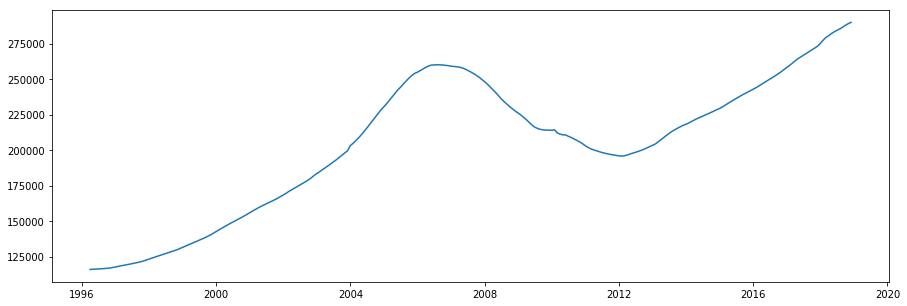

In [0]:
plt.figure(figsize=(15,5))
plt.plot(price_mean_by_time_df['Time'], price_mean_by_time_df['AveragePurchasePrice'])

## Explore and Compare House Price by State

In [0]:
house_price_with_mean = house_price_df.copy()
house_price_with_mean['mean_price'] = price_extract.mean(axis=1, skipna=True)
house_price_by_state = house_price_with_mean.groupby(['State'], as_index=False).mean()
house_price_by_state = house_price_by_state[['State', 'mean_price']]
house_price_by_state.head()

,State,mean_price
0,AK,244079.434851
1,AL,123622.218568
2,AR,102091.211069
3,AZ,200776.050538
4,CA,462483.723886


In [0]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'
house_price_map_by_state = folium.Map(location=[45,-98], zoom_start=4)
folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=house_price_by_state,
    columns=['State', 'mean_price'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average House Price by State from 1996 to 2018'
).add_to(house_price_map_by_state)
folium.LayerControl().add_to(house_price_map_by_state)
house_price_map_by_state

In [0]:
house_price_by_county = house_price_with_mean.groupby(['County'], as_index=False).mean()
house_price_by_county = house_price_by_county[['County', 'mean_price']]
house_price_by_county.head()

,County,mean_price
0,Acadia Parish,80618.684180
1,Ada,197672.967033
2,Adair,82650.000000
3,Adams,153155.274725
4,Addison,183361.721612


In [0]:
house_price_by_zip = house_price_with_mean.groupby(['ZipCode'], as_index=False).mean()
house_price_by_zip = house_price_by_zip[['ZipCode', 'mean_price']]
house_price_by_zip.head()

,ZipCode,mean_price
0,1001,176079.120879
1,1002,275906.959707
2,1005,174315.750916
3,1007,219664.468864
4,1008,176797.435897


In [0]:
def pad_zipcode(zip):
    zip = str(zip)
    if (len(zip) < 5):
        repeat = 5 - len(zip)
        return ('0' * repeat) + zip
    return zip

In [0]:
house_price_by_zip['ZipCode'] = house_price_by_zip['ZipCode'].apply(pad_zipcode)
house_price_by_zip.set_index('ZipCode', inplace=True)
house_price_by_zip.head()

,mean_price
ZipCode,
01001,176079.120879
01002,275906.959707
01005,174315.750916
01007,219664.468864
01008,176797.435897


In [0]:
# county_geo = f'{url}/us_counties_20m_topo.json'
# colorscale = branca.colormap.linear.YlOrRd_09.scale(0, 50e3)

# def style_function(feature):
#     priced = house_price_by_zip.get(int(feature['id'][-5:]), None)
#     return {
#         'fillOpacity': 0.5,
#         'weight': 0.1,
#         'fillColor': '#black' if priced is None else colorscale(priced)
#     }

# house_price_map_by_zip = folium.Map(
#     location=[45,-98], 
#     zoom_start=4,
#     tiles='cartodbpositron'
# )
# folium.TopoJson(
#     json.loads(requests.get(county_geo).text),
#     'objects.us_counties_20m',
#     style_function=style_function
# ).add_to(house_price_map_by_zip)
# house_price_map_by_zip

## Explore House Price Distribution

In [0]:
house_price_df.shape

(15508, 281)

In [0]:
null_columns = house_price_df.columns[house_price_df.isnull().any()]
house_price_df[null_columns].isnull().sum().sort_index()

1996-04    1170
1996-05    1170
1996-06    1170
1996-07    1170
1996-08    1170
1996-09    1170
1996-10    1170
1996-11    1170
1996-12    1170
1997-01    1170
1997-02    1170
1997-03    1170
1997-04    1170
1997-05    1170
1997-06    1170
1997-07    1169
1997-08    1169
1997-09    1169
1997-10    1169
1997-11    1169
1997-12    1169
1998-01    1167
1998-02    1167
1998-03    1167
1998-04    1167
1998-05    1167
1998-06    1167
1998-07    1167
1998-08    1167
1998-09    1167
           ... 
2012-08     235
2012-09     235
2012-10     235
2012-11     235
2012-12     235
2013-01     188
2013-02     188
2013-03     188
2013-04     188
2013-05     188
2013-06     188
2013-07     141
2013-08     141
2013-09     141
2013-10     141
2013-11     141
2013-12     141
2014-01      84
2014-02      84
2014-03      84
2014-04      84
2014-05      84
2014-06      84
2014-07      45
2014-08      45
2014-09      45
2014-10      45
2014-11      45
2014-12      45
Metro      1403
Length: 226, dtype: int6

* Metro column has the most missing value, will consider to drop this column if it isn't important enough
* Numbers of missing values come with time. The older the dates are, the more rows have missing values. 

In [0]:
house_price_processed_df = house_price_df.copy()
house_price_processed_df['null_count'] = house_price_processed_df[house_price_df.isnull().any(axis=1)].isnull().sum(axis=1)
house_price_processed_df['null_count'].fillna(0, inplace=True)
house_price_processed_df['null_count'].value_counts().sort_index(ascending=False)

226.0        7
225.0       38
220.0        3
219.0       36
214.0        4
213.0       53
208.0        2
207.0       45
202.0        3
201.0       44
196.0        3
195.0       17
190.0       13
189.0       12
184.0        9
183.0       17
178.0        8
177.0       32
172.0       11
171.0       57
168.0      160
167.0       61
165.0        1
159.0        8
154.0        1
153.0        7
148.0        1
147.0        8
142.0        1
141.0        7
136.0        5
135.0        2
130.0        5
129.0       28
124.0        8
123.0       26
118.0       18
117.0       55
112.0       19
111.0       72
107.0       13
106.0       14
105.0       45
100.0        1
99.0        23
94.0         2
93.0        31
88.0        21
87.0       110
21.0         2
15.0         1
1.0       1084
0.0      13254
Name: null_count, dtype: int64

* null_count column indicates how many missing values each row has. There are 13,254 rows have no missing value, which accounts for 85% of the dataset. 
* There are 1,084 rows that has 1 null value, which is about 7% of the dataset. 


In [0]:
house_price_processed_df['average_price'] = house_price_processed_df.loc[:, '1996-04':'2018-12'].mean(axis=1)
house_price_processed_df[house_price_processed_df['null_count'] == 226].head()

,Unnamed: 0,RegionID,ZipCode,City,State,Metro,County,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,null_count,average_price
8336,8336,73881,36467,Opp,AL,NaN,Covington,8337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60800,61200,61900,62700,63500,64000,64500,64700,65100,65300,65300,65100,65200,65200,65400,65600,65600,65400,65300,65200,65100,65100,65000,65000,65100,65100,65100,65000,64700,64800,65100,64700,64900,66200,67700,68400,68500,68000,226.0,63893.750000
8390,8390,59663,4769,Presque Isle,ME,NaN,Aroostook,8391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,117700,117700,114200,113200,114200,114000,113100,114700,119600,124100,125000,124000,122700,118800,114300,113000,113400,112600,112700,114500,117900,120300,120800,121600,123900,122900,120200,119900,121400,122100,122200,122600,125600,130200,133200,134100,133700,130500,226.0,117377.083333
10103,10103,75185,39168,Taylorsville,MS,NaN,Smith,10104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95300,99000,100000,103100,106500,109200,109900,106500,102200,101800,103700,102200,96900,92400,91700,92500,93000,92600,92400,92800,93000,92900,93400,92600,90300,88600,88900,90000,90900,91900,94300,97600,101100,104300,107900,109500,110400,111600,226.0,95829.166667
10606,10606,87277,66713,Baxter Springs,KS,NaN,Cherokee,10607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47800,47400,47000,47400,48400,49100,49400,49800,49600,49200,48800,48200,47700,47300,46800,47400,48900,50100,50600,51200,51500,51000,50000,49700,50000,50500,50900,51400,52000,52500,52700,53900,55900,57700,58300,58500,58900,59300,226.0,50112.500000
11914,11914,59387,4217,Bethel,ME,NaN,Oxford,11915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,129200,134500,140600,146300,148700,146300,145000,145500,148700,153000,156900,158800,158700,156900,154000,152700,150700,147200,144800,145900,148700,153300,157600,162300,167500,171700,175900,181800,181800,174600,169200,168200,170000,175000,181700,186100,187100,185900,226.0,151456.250000


In [0]:
house_price_processed_df[house_price_processed_df['null_count'] == 1].head()

,Unnamed: 0,RegionID,ZipCode,City,State,Metro,County,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,null_count,average_price
2532,2532,70178,28734,Franklin,NC,NaN,Macon,2533,62000.0,62200.0,62400.0,62700.0,63000.0,63300.0,63500.0,63600.0,63800.0,63900.0,64000.0,64000.0,64100.0,64100.0,64300.0,64500.0,64900.0,65400.0,66100.0,67000.0,68100.0,69300.0,70500.0,71800.0,72900.0,74000.0,74900.0,75700.0,76400.0,77100.0,77800.0,78400.0,...,133400,133800,134700,135700,136300,137000,137600,138000,138200,138400,138400,138200,138100,138300,138700,139500,140600,141500,142000,142500,143000,143800,144700,145100,144800,144200,143700,143100,142800,142700,142600,143000,144200,145400,146700,148500,150900,152700,1.0,119057.509158
2859,2859,91865,77351,West Livingston,TX,NaN,Polk,2860,60700.0,60700.0,60800.0,60900.0,61000.0,61200.0,61400.0,61600.0,61800.0,62100.0,62400.0,62700.0,63100.0,63500.0,64000.0,64500.0,65000.0,65500.0,66000.0,66600.0,67100.0,67700.0,68200.0,68700.0,69100.0,69400.0,69800.0,70100.0,70300.0,70600.0,70800.0,71100.0,...,119300,119600,119800,120300,121200,122200,123100,123900,124700,125500,126200,126900,127500,128500,129700,130900,132100,133400,134400,134900,135200,136100,137400,138600,139200,139500,139900,140200,140400,140800,141600,142300,143400,145100,146700,147800,148400,148700,1.0,94566.300366
3576,3576,75303,39452,Lucedale,MS,NaN,George,3577,78800.0,78900.0,79000.0,79100.0,79200.0,79300.0,79400.0,79500.0,79600.0,79700.0,79800.0,79800.0,79900.0,79900.0,79900.0,79800.0,79800.0,79700.0,79600.0,79400.0,79200.0,79000.0,78800.0,78500.0,78200.0,77900.0,77600.0,77300.0,77000.0,76800.0,76600.0,76400.0,...,133500,137000,139700,142000,143900,145400,146200,146500,146800,147300,146300,145100,144000,142500,141100,141000,140900,140100,139200,139000,139700,140800,141300,140700,140600,140600,140500,140700,141200,141400,141000,140700,140300,139100,137700,137300,137400,137500,1.0,106069.230769
3998,3998,71180,30533,Dahlonega,GA,NaN,Lumpkin,3999,65300.0,65600.0,65800.0,65800.0,65800.0,65800.0,65700.0,65600.0,65600.0,65800.0,66100.0,66400.0,66900.0,67600.0,68400.0,69400.0,70700.0,72100.0,73700.0,75600.0,77900.0,80300.0,82800.0,85000.0,87200.0,89100.0,90800.0,92000.0,93000.0,93900.0,94800.0,95600.0,...,169300,170000,171000,172500,174400,175700,175900,176200,177100,177500,177200,177400,177900,178700,180300,182400,184400,186100,187700,189400,190600,191000,191200,191300,191200,191400,191800,192000,191400,192800,195700,196600,195900,196900,199400,202000,204200,206200,1.0,143693.406593
4045,4045,74894,38583,Sparta,TN,NaN,White,4046,44100.0,44200.0,44500.0,44900.0,45400.0,46000.0,46600.0,47200.0,47900.0,48500.0,49100.0,49700.0,50300.0,50900.0,51400.0,51800.0,52300.0,52600.0,53000.0,53400.0,53700.0,54000.0,54200.0,54500.0,54600.0,54800.0,54900.0,54900.0,55000.0,55100.0,55200.0,55300.0,...,87600,87900,88200,88600,89000,89300,89900,90700,91200,91600,92000,92300,92500,92800,93400,94200,95200,96000,96800,97400,97900,98200,98400,98800,99500,100300,101500,102900,104500,106000,107000,107500,108200,109500,110500,110800,111200,111700,1.0,73276.556777


* Metro column will be dropped from house_price_processed_df because it doesn't provide much valuable info for now

In [0]:
house_price_processed_df = house_price_processed_df.drop(['Metro'], axis=1)
house_price_processed_df.head()

,Unnamed: 0,RegionID,ZipCode,City,State,County,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,null_count,average_price
0,0,84654,60657,Chicago,IL,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,...,947200,950900,952700,959000,966400,970300,973200,973300,970600,971800,977800,985200,992900,997600,996000,993100,991500,990000,991400,998200,1004000,1006800,1008400,1011300,1015500,1022000,1028900,1034500,1037400,1038700,1041500,1042800,1042900,1044400,1047800,1049700,1048300,1047900,0.0,753125.641026
1,1,91982,77494,Katy,TX,Harris,2,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,197300.0,195400.0,193000.0,191800.0,191800.0,193000.0,195200.0,198400.0,202800.0,208000.0,213800.0,220700.0,227500.0,231800.0,233400.0,233900.0,233500.0,233300.0,234300.0,237400.0,242800.0,250200.0,258600.0,268000.0,...,324400,326400,327400,326900,327300,328900,330000,330000,328900,327500,326300,325300,324700,324700,323700,322100,320800,320400,320300,320900,320900,320300,319800,320200,320800,321100,322700,326500,330400,332700,334500,335900,337000,338300,338400,336900,336000,336500,0.0,264351.648352
2,2,84616,60614,Chicago,IL,Cook,3,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,503400.0,502200.0,500000.0,497900.0,496300.0,495200.0,494700.0,494900.0,496200.0,498600.0,502000.0,507600.0,514900.0,522200.0,529500.0,537900.0,546900.0,556400.0,566100.0,575600.0,584800.0,593500.0,601600.0,610100.0,...,1218000,1226400,1230300,1234700,1240300,1244700,1245800,1245300,1243700,1243400,1245000,1250800,1259300,1266600,1270800,1274500,1278900,1282600,1285800,1288100,1288500,1287500,1289200,1295000,1301100,1304300,1310100,1315300,1317900,1321100,1325300,1323800,1321200,1320700,1319500,1318800,1319700,1323300,0.0,984821.611722
3,3,93144,79936,El Paso,TX,El Paso,4,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,77700.0,77800.0,77900.0,77900.0,77800.0,77800.0,77800.0,77800.0,77800.0,77900.0,78100.0,78200.0,78400.0,78600.0,78800.0,79000.0,79100.0,79200.0,79300.0,79300.0,79300.0,79400.0,79500.0,79500.0,79600.0,...,115700,116200,116200,115700,115100,114700,114300,114000,114000,113800,114000,114800,115600,116200,116800,117400,117800,118200,118700,119000,119100,119400,119900,120200,120200,120100,120300,120500,120800,121300,122200,123000,123600,124500,125600,126300,126800,127400,0.0,102547.252747
4,4,91940,77449,Katy,TX,Harris,5,95400.0,95600.0,95800.0,96100.0,96400.0,96700.0,96800.0,96800.0,96700.0,96600.0,96400.0,96200.0,96100.0,96200.0,96300.0,96600.0,97000.0,97500.0,98000.0,98400.0,98800.0,99200.0,99500.0,99700.0,100000.0,100200.0,100400.0,100700.0,101100.0,101800.0,102900.0,104300.0,106200.0,...,153000,154100,156000,157800,159600,161700,164200,166100,167400,168100,168400,168400,168400,168400,168200,167900,167400,167000,166900,166800,166800,167300,168300,169500,170700,172100,173500,174600,175500,176400,176900,176900,177300,178000,178500,179300,180200,180700,0.0,128052.380952


In [0]:
house_price_processed_df['null_count'] = house_price_processed_df[house_price_df.isnull().any(axis=1)].isnull().sum(axis=1)
house_price_processed_df['null_count'].fillna(0, inplace=True)
house_price_processed_df['null_count'].value_counts().sort_index(ascending=False)

225.0       45
219.0       39
213.0       57
207.0       47
201.0       47
195.0       20
189.0       25
183.0       26
177.0       40
171.0       68
167.0      221
165.0        1
159.0        8
153.0        8
147.0        9
141.0        8
135.0        7
129.0       33
123.0       34
117.0       73
111.0       91
107.0       13
105.0       59
99.0        24
93.0        33
87.0       131
21.0         2
15.0         1
0.0      14338
Name: null_count, dtype: int64

* Dropping Metro column results in less data rows with missing value. This shows better data

In [0]:
house_price_processed_df[house_price_processed_df['null_count'] == 225].head()

,Unnamed: 0,RegionID,ZipCode,City,State,County,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,null_count,average_price
350,350,62036,11225,New York,NY,Kings,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1524600,1533500,1537900,1561000,1597100,1624800,1636100,1641600,1634700,1633900,1635300,1613000,1573400,1563100,1565100,1563000,1559900,1554400,1542600,1524800,1519800,1527800,1536200,1540500,1532500,1510500,1504100,1518000,1528800,1534700,1536900,1543700,1557500,1575400,1585100,1578600,1563900,1555400,225.0,1.521419e+06
402,402,84340,60085,Waukegan,IL,Lake,403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73200,73700,74200,75300,77100,78800,81500,84400,86200,87600,88800,89800,91900,95100,97900,100000,102300,104500,106000,106300,106600,107200,107700,107600,108000,108400,109800,112700,115400,116600,117600,117800,117100,116500,115900,116000,117300,118100,225.0,9.441250e+04
541,541,65798,19131,Philadelphia,PA,Philadelphia,542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69100,65700,63300,62600,63400,64600,65700,65700,64700,63500,62700,62100,61900,62900,65000,67200,68700,70000,71000,72000,74500,78200,80900,83000,86300,90200,93300,95400,97100,99000,100700,102300,102500,102100,103100,104700,104700,104100,225.0,7.846250e+04
2995,2995,73623,35810,Huntsville,AL,Madison,2996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55900,56500,56700,56900,57200,58200,58900,58400,57500,57200,57000,57100,57800,57800,57000,57000,58200,59500,60000,60400,60600,60500,60400,61000,61800,62000,62500,64200,66500,68500,70000,70800,70800,70900,71000,71800,72400,71900,225.0,6.079375e+04
3363,3363,58630,2116,Boston,MA,Suffolk,3364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1950800,1946700,1927800,1908300,1877400,1887900,1939100,1961000,1939900,1934600,1951300,1976100,2000600,2007500,1973700,1926300,1886800,1878400,1888400,1905100,1939800,1988200,2017600,2031400,2033800,2026100,2017100,1963600,1900400,1896500,1929200,1932500,1942800,1958000,1952800,1940700,1941200,1957500,225.0,1.912758e+06


In [0]:
house_price_replaced_min = house_price_processed_df.copy()
house_price_replaced_min.loc[:, '1996-04':'2018-12'] = house_price_replaced_min.loc[:, '1996-04':'2018-12'].apply(lambda row: row.fillna(row.min()), axis=1)
house_price_replaced_min[house_price_replaced_min['null_count'] == 225].head()

,Unnamed: 0,RegionID,ZipCode,City,State,County,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,null_count,average_price
350,350,62036,11225,New York,NY,Kings,351,1204000.0,1204000.0,1204000.0,1204000.0,1204000.0,1204000.0,1204000.0,1204000.0,1204000.0,1204000.0,1204000.0,1204000.0,1204000.0,1204000.0,1204000.0,1204000.0,1204000.0,1204000.0,1204000.0,1204000.0,1204000.0,1204000.0,1204000.0,1204000.0,1204000.0,1204000.0,1204000.0,1204000.0,1204000.0,1204000.0,1204000.0,1204000.0,1204000.0,...,1524600.0,1533500.0,1537900.0,1561000.0,1597100.0,1624800.0,1636100.0,1641600.0,1634700.0,1633900.0,1635300.0,1613000.0,1573400.0,1563100.0,1565100.0,1563000.0,1559900.0,1554400.0,1542600.0,1524800.0,1519800.0,1527800.0,1536200.0,1540500.0,1532500.0,1510500.0,1504100.0,1518000.0,1528800.0,1534700.0,1536900.0,1543700.0,1557500.0,1575400.0,1585100.0,1578600.0,1563900.0,1555400.0,225.0,1.521419e+06
402,402,84340,60085,Waukegan,IL,Lake,403,69100.0,69100.0,69100.0,69100.0,69100.0,69100.0,69100.0,69100.0,69100.0,69100.0,69100.0,69100.0,69100.0,69100.0,69100.0,69100.0,69100.0,69100.0,69100.0,69100.0,69100.0,69100.0,69100.0,69100.0,69100.0,69100.0,69100.0,69100.0,69100.0,69100.0,69100.0,69100.0,69100.0,...,73200.0,73700.0,74200.0,75300.0,77100.0,78800.0,81500.0,84400.0,86200.0,87600.0,88800.0,89800.0,91900.0,95100.0,97900.0,100000.0,102300.0,104500.0,106000.0,106300.0,106600.0,107200.0,107700.0,107600.0,108000.0,108400.0,109800.0,112700.0,115400.0,116600.0,117600.0,117800.0,117100.0,116500.0,115900.0,116000.0,117300.0,118100.0,225.0,9.441250e+04
541,541,65798,19131,Philadelphia,PA,Philadelphia,542,61900.0,61900.0,61900.0,61900.0,61900.0,61900.0,61900.0,61900.0,61900.0,61900.0,61900.0,61900.0,61900.0,61900.0,61900.0,61900.0,61900.0,61900.0,61900.0,61900.0,61900.0,61900.0,61900.0,61900.0,61900.0,61900.0,61900.0,61900.0,61900.0,61900.0,61900.0,61900.0,61900.0,...,69100.0,65700.0,63300.0,62600.0,63400.0,64600.0,65700.0,65700.0,64700.0,63500.0,62700.0,62100.0,61900.0,62900.0,65000.0,67200.0,68700.0,70000.0,71000.0,72000.0,74500.0,78200.0,80900.0,83000.0,86300.0,90200.0,93300.0,95400.0,97100.0,99000.0,100700.0,102300.0,102500.0,102100.0,103100.0,104700.0,104700.0,104100.0,225.0,7.846250e+04
2995,2995,73623,35810,Huntsville,AL,Madison,2996,55200.0,55200.0,55200.0,55200.0,55200.0,55200.0,55200.0,55200.0,55200.0,55200.0,55200.0,55200.0,55200.0,55200.0,55200.0,55200.0,55200.0,55200.0,55200.0,55200.0,55200.0,55200.0,55200.0,55200.0,55200.0,55200.0,55200.0,55200.0,55200.0,55200.0,55200.0,55200.0,55200.0,...,55900.0,56500.0,56700.0,56900.0,57200.0,58200.0,58900.0,58400.0,57500.0,57200.0,57000.0,57100.0,57800.0,57800.0,57000.0,57000.0,58200.0,59500.0,60000.0,60400.0,60600.0,60500.0,60400.0,61000.0,61800.0,62000.0,62500.0,64200.0,66500.0,68500.0,70000.0,70800.0,70800.0,70900.0,71000.0,71800.0,72400.0,71900.0,225.0,6.079375e+04
3363,3363,58630,2116,Boston,MA,Suffolk,3364,1688900.0,1688900.0,1688900.0,1688900.0,1688900.0,1688900.0,1688900.0,1688900.0,1688900.0,1688900.0,1688900.0,1688900.0,1688900.0,1688900.0,1688900.0,1688900.0,1688900.0,1688900.0,1688900.0,1688900.0,1688900.0,1688900.0,1688900.0,1688900.0,1688900.0,1688900.0,1688900.0,1688900.0,1688900.0,1688900.0,1688900.0,1688900.0,1688900.0,...,1950800.0,1946700.0,1927800.0,1908300.0,1877400.0,1887900.0,1939100.0,1961000.0,1939900.0,1934600.0,1951300.0,1976100.0,2000600.0,2007500.0,1973700.0,1926300.0,1886800.0,1878400.0,1888400.0,1905100.0,1939800.0,1988200.0,2017600.0,2031400.0,2033800

In [0]:
house_price_replaced_mean = house_price_processed_df.copy()
house_price_replaced_mean.loc[:, '1996-04':'2018-12'] = house_price_replaced_mean.loc[:, '1996-04':'2018-12'].apply(lambda row: row.fillna(row.mean()), axis=1)
house_price_replaced_mean[house_price_replaced_mean['null_count'] == 225].head()

,Unnamed: 0,RegionID,ZipCode,City,State,County,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,null_count,average_price
350,350,62036,11225,New York,NY,Kings,351,1.521419e+06,1.521419e+06,1.521419e+06,1.521419e+06,1.521419e+06,1.521419e+06,1.521419e+06,1.521419e+06,1.521419e+06,1.521419e+06,1.521419e+06,1.521419e+06,1.521419e+06,1.521419e+06,1.521419e+06,1.521419e+06,1.521419e+06,1.521419e+06,1.521419e+06,1.521419e+06,1.521419e+06,1.521419e+06,1.521419e+06,1.521419e+06,1.521419e+06,1.521419e+06,1.521419e+06,1.521419e+06,1.521419e+06,1.521419e+06,1.521419e+06,1.521419e+06,1.521419e+06,...,1524600.0,1533500.0,1537900.0,1561000.0,1597100.0,1624800.0,1636100.0,1641600.0,1634700.0,1633900.0,1635300.0,1613000.0,1573400.0,1563100.0,1565100.0,1563000.0,1559900.0,1554400.0,1542600.0,1524800.0,1519800.0,1527800.0,1536200.0,1540500.0,1532500.0,1510500.0,1504100.0,1518000.0,1528800.0,1534700.0,1536900.0,1543700.0,1557500.0,1575400.0,1585100.0,1578600.0,1563900.0,1555400.0,225.0,1.521419e+06
402,402,84340,60085,Waukegan,IL,Lake,403,9.441250e+04,9.441250e+04,9.441250e+04,9.441250e+04,9.441250e+04,9.441250e+04,9.441250e+04,9.441250e+04,9.441250e+04,9.441250e+04,9.441250e+04,9.441250e+04,9.441250e+04,9.441250e+04,9.441250e+04,9.441250e+04,9.441250e+04,9.441250e+04,9.441250e+04,9.441250e+04,9.441250e+04,9.441250e+04,9.441250e+04,9.441250e+04,9.441250e+04,9.441250e+04,9.441250e+04,9.441250e+04,9.441250e+04,9.441250e+04,9.441250e+04,9.441250e+04,9.441250e+04,...,73200.0,73700.0,74200.0,75300.0,77100.0,78800.0,81500.0,84400.0,86200.0,87600.0,88800.0,89800.0,91900.0,95100.0,97900.0,100000.0,102300.0,104500.0,106000.0,106300.0,106600.0,107200.0,107700.0,107600.0,108000.0,108400.0,109800.0,112700.0,115400.0,116600.0,117600.0,117800.0,117100.0,116500.0,115900.0,116000.0,117300.0,118100.0,225.0,9.441250e+04
541,541,65798,19131,Philadelphia,PA,Philadelphia,542,7.846250e+04,7.846250e+04,7.846250e+04,7.846250e+04,7.846250e+04,7.846250e+04,7.846250e+04,7.846250e+04,7.846250e+04,7.846250e+04,7.846250e+04,7.846250e+04,7.846250e+04,7.846250e+04,7.846250e+04,7.846250e+04,7.846250e+04,7.846250e+04,7.846250e+04,7.846250e+04,7.846250e+04,7.846250e+04,7.846250e+04,7.846250e+04,7.846250e+04,7.846250e+04,7.846250e+04,7.846250e+04,7.846250e+04,7.846250e+04,7.846250e+04,7.846250e+04,7.846250e+04,...,69100.0,65700.0,63300.0,62600.0,63400.0,64600.0,65700.0,65700.0,64700.0,63500.0,62700.0,62100.0,61900.0,62900.0,65000.0,67200.0,68700.0,70000.0,71000.0,72000.0,74500.0,78200.0,80900.0,83000.0,86300.0,90200.0,93300.0,95400.0,97100.0,99000.0,100700.0,102300.0,102500.0,102100.0,103100.0,104700.0,104700.0,104100.0,225.0,7.846250e+04
2995,2995,73623,35810,Huntsville,AL,Madison,2996,6.079375e+04,6.079375e+04,6.079375e+04,6.079375e+04,6.079375e+04,6.079375e+04,6.079375e+04,6.079375e+04,6.079375e+04,6.079375e+04,6.079375e+04,6.079375e+04,6.079375e+04,6.079375e+04,6.079375e+04,6.079375e+04,6.079375e+04,6.079375e+04,6.079375e+04,6.079375e+04,6.079375e+04,6.079375e+04,6.079375e+04,6.079375e+04,6.079375e+04,6.079375e+04,6.079375e+04,6.079375e+04,6.079375e+04,6.079375e+04,6.079375e+04,6.079375e+04,6.079375e+04,...,55900.0,56500.0,56700.0,56900.0,57200.0,58200.0,58900.0,58400.0,57500.0,57200.0,57000.0,57100.0,57800.0,57800.0,57000.0,57000.0,58200.0,59500.0,60000.0,60400.0,60600.0,60500.0,60400.0,61000.0,61800.0,62000.0,62500.0,64200.0,66500.0,68500.0,70000.0,70800.0,70800.0,70900.0,71000.0,71800.0,72400.0,71900.0,225.0,6.079375e+04
3363,3363,58630,2116,Boston,MA,

In [0]:
house_price_dropped_na = house_price_processed_df.copy()
house_price_dropped_na.dropna(inplace=True)

Text(0.5, 1.0, 'Dropped NaN values')

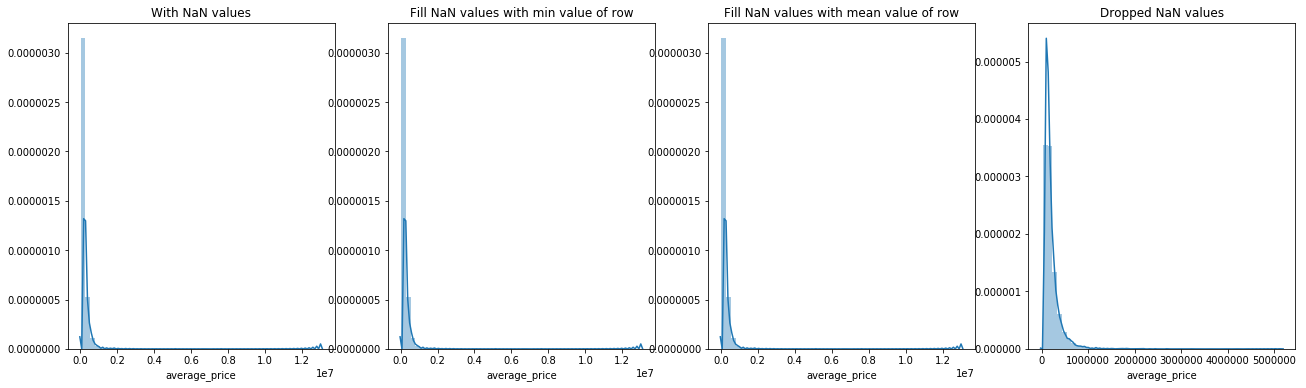

In [0]:
fig, axes = plt.subplots(1,4,figsize=(22,6))
sns.distplot(house_price_processed_df['average_price'], ax=axes[0])
axes[0].set_title('With NaN values')
sns.distplot(house_price_replaced_min['average_price'], ax=axes[1])
axes[1].set_title('Fill NaN values with min value of row')
sns.distplot(house_price_replaced_mean['average_price'], ax=axes[2])
axes[2].set_title('Fill NaN values with mean value of row')
sns.distplot(house_price_dropped_na['average_price'], ax=axes[3])
axes[3].set_title('Dropped NaN values')

Text(0.5, 0, 'log(1+price)')

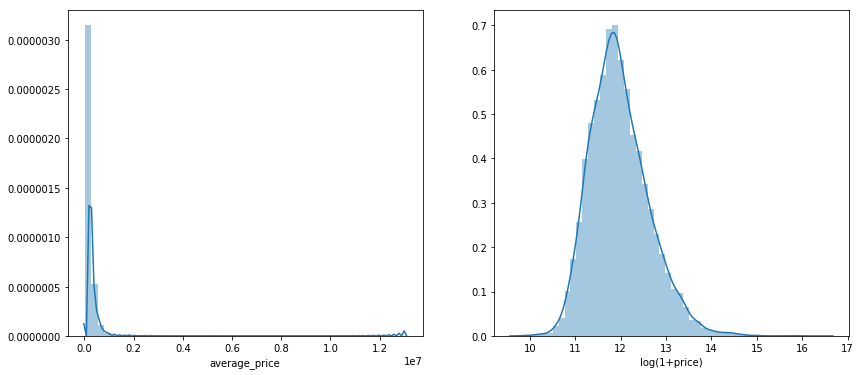

In [0]:
4fig, axes = plt.subplots(1,2,figsize=(14,6))
sns.distplot(house_price_processed_df['average_price'], ax=axes[0])
sns.distplot(np.log1p(house_price_processed_df['average_price']), ax=axes[1])
axes[1].set_xlabel("log(1+price)")